# Loan Eligibility
***

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
%matplotlib inline

https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

https://medium.com/@pinnzonandres/loan-prediction-with-python-d32cf65b5443

Load Data set

In [2]:
loan_eligibility = pd.read_csv("loan-train.csv")

In [3]:
print(loan_eligibility.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
loan_describe = loan_eligibility.head(10)
print(loan_describe)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [5]:
print(loan_eligibility.shape)

print(loan_eligibility["Loan_Status"].value_counts())

(614, 13)
Y    422
N    192
Name: Loan_Status, dtype: int64


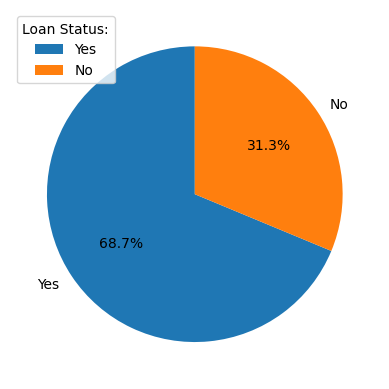

In [6]:
Loan_Yes_No = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]

plt.pie(Loan_Yes_No, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.legend(title = "Loan Status:")
plt.show()

In [7]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
loan_eligibility["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Clean the Loan Dataset
***

In [9]:
loan_eligibility.dropna(inplace=True)

In [10]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


### Check for duplicates

In [11]:
loan_eligibility.drop_duplicates(inplace=True)

In [12]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


In [13]:
df = loan_eligibility

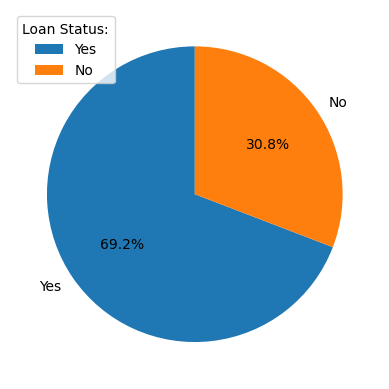

Y    332
N    148
Name: Loan_Status, dtype: int64


In [14]:
df_Loan = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]
values = [332, 148]
#mylabels = [values[0], [values[]]
plt.pie(df_Loan, labels = mylabels, startangle = 90, autopct='%1.1f%%')
# absolute_value
# '%1.1f%%'
plt.legend(title = "Loan Status:")
plt.show()
print(df_Loan)

In [15]:
df_loan = (loan_eligibility["Loan_Status"].value_counts())

In [16]:
loan_eligibility["Property_Area"]

1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 480, dtype: object

## Univariate Analysis

In [17]:
Loan_Status_Groups = loan_eligibility.groupby('Loan_Status')

In [18]:
Loan_No = Loan_Status_Groups.get_group('N')
print(Loan_No.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       148.000000         148.000000  148.000000        148.000000   
mean       5730.189189        1773.081081  153.378378        342.810811   
std        7560.806737        3663.685217   90.339150         72.787021   
min         150.000000           0.000000    9.000000         36.000000   
25%        2863.500000           0.000000  100.000000        360.000000   
50%        3871.000000           0.000000  128.000000        360.000000   
75%        6046.250000        2356.250000  178.500000        360.000000   
max       81000.000000       33837.000000  570.000000        480.000000   

       Credit_History  
count      148.000000  
mean         0.574324  
std          0.496124  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [19]:
Loan_Yes = Loan_Status_Groups.get_group('Y')
print(Loan_Yes.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       332.000000         332.000000  332.000000        332.000000   
mean       5201.093373        1495.508795  140.882530        341.710843   
std        4584.815491        1982.742932   75.544237         61.651497   
min         645.000000           0.000000   17.000000         60.000000   
25%        2912.750000           0.000000  100.000000        360.000000   
50%        3858.500000        1211.500000  128.000000        360.000000   
75%        5818.250000        2250.000000  162.000000        360.000000   
max       39999.000000       20000.000000  600.000000        480.000000   

       Credit_History  
count      332.000000  
mean         0.978916  
std          0.143882  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


## Histograms 

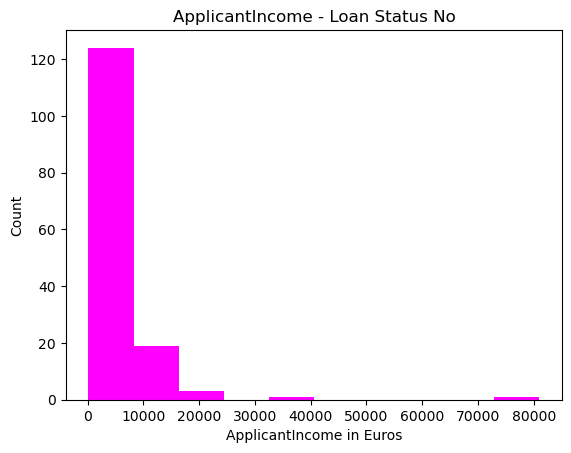

In [20]:
Status_No_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_No_ApplicantIncome, bins = 10, color = "magenta")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

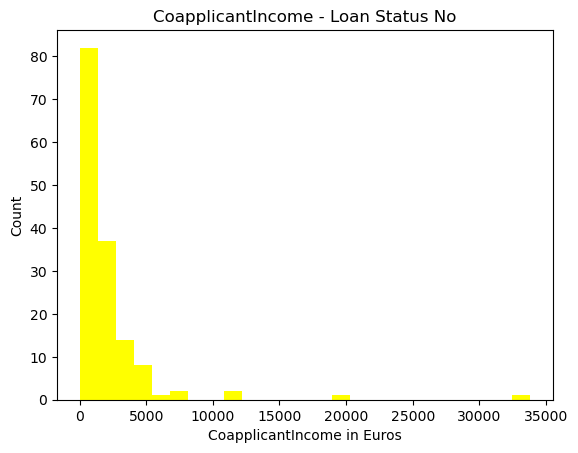

In [21]:
Status_No_CoapplicantIncome = Loan_No["CoapplicantIncome"]
  
plt.hist(Status_No_CoapplicantIncome, bins = 25, color = "yellow")
plt.title("CoapplicantIncome - Loan Status No")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

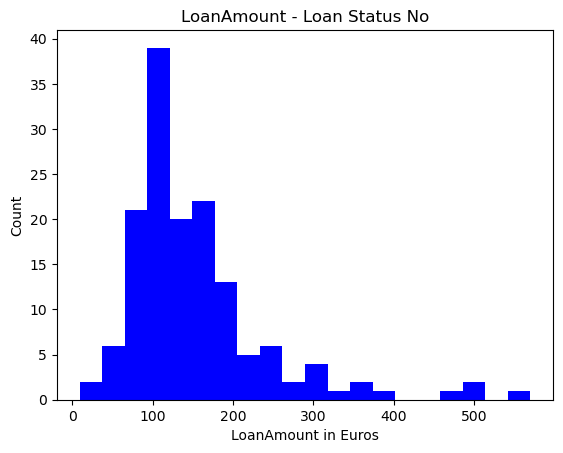

In [22]:
Status_No_LoanAmount = Loan_No["LoanAmount"]
  
plt.hist(Status_No_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status No")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

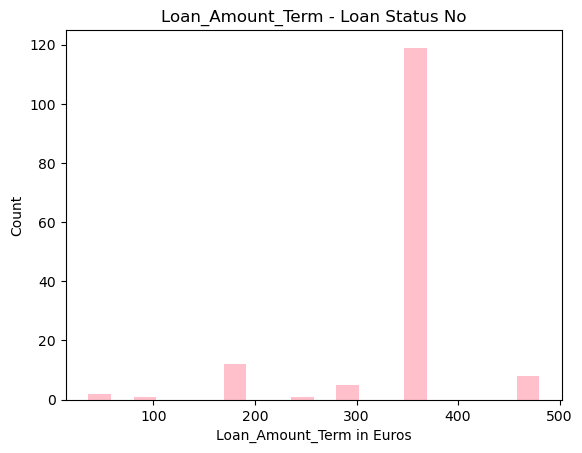

In [23]:
Status_No_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_No_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

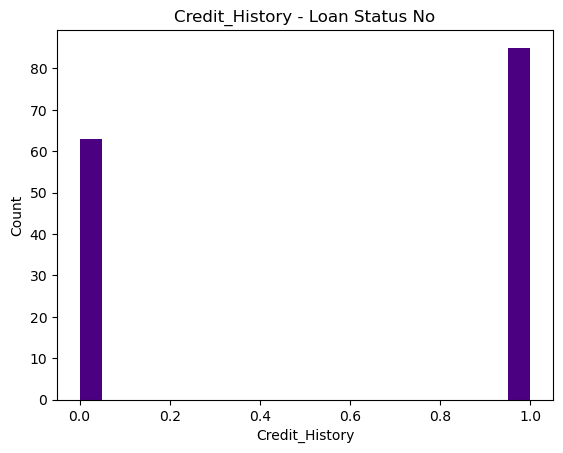

In [24]:
Status_No_Credit_History = Loan_No["Credit_History"]
  
plt.hist(Status_No_Credit_History, bins = 20, color = "indigo")
plt.title("Credit_History - Loan Status No")
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()

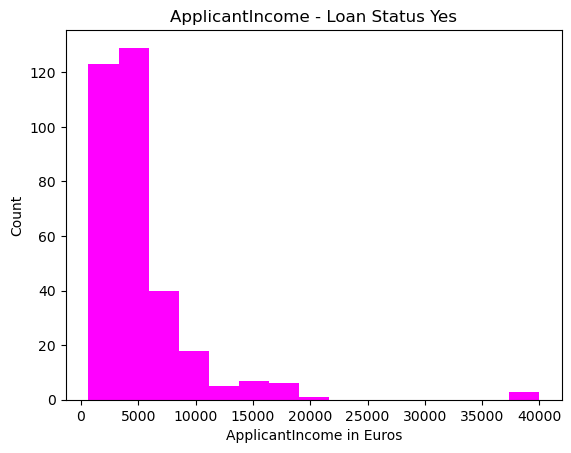

In [25]:
Status_Yes_ApplicantIncome = Loan_Yes["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "magenta")
plt.title("ApplicantIncome - Loan Status Yes")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

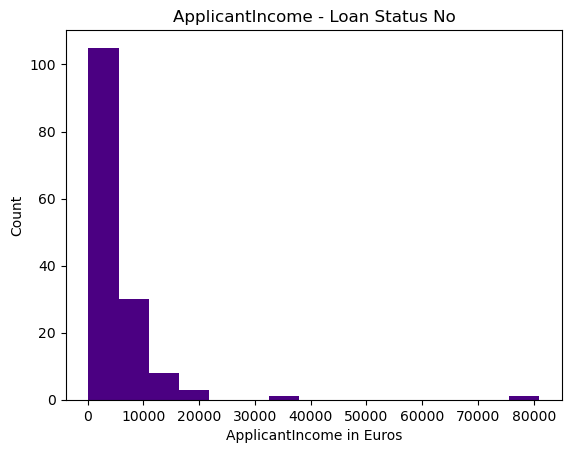

In [26]:
Status_Yes_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

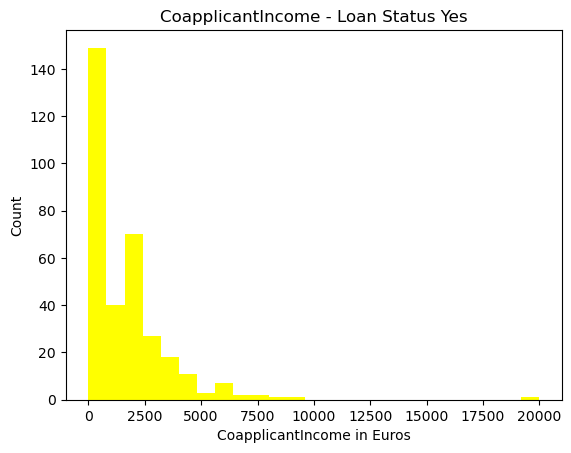

In [27]:
Status_Yes_CoapplicantIncome = Loan_Yes["CoapplicantIncome"]
  
plt.hist(Status_Yes_CoapplicantIncome, bins = 25, color = "yellow")
plt.title("CoapplicantIncome - Loan Status Yes")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

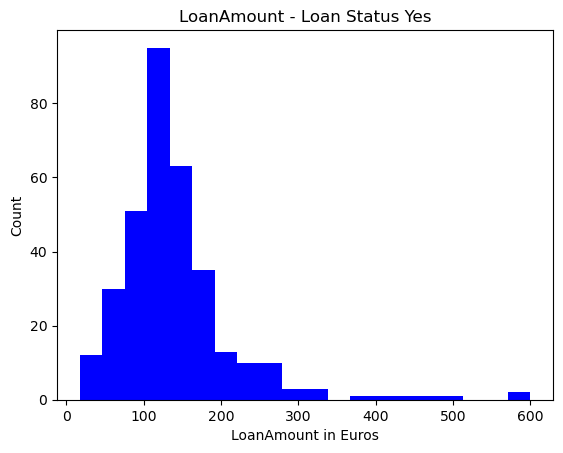

In [28]:
Status_Yes_LoanAmount = Loan_Yes["LoanAmount"]
  
plt.hist(Status_Yes_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status Yes")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

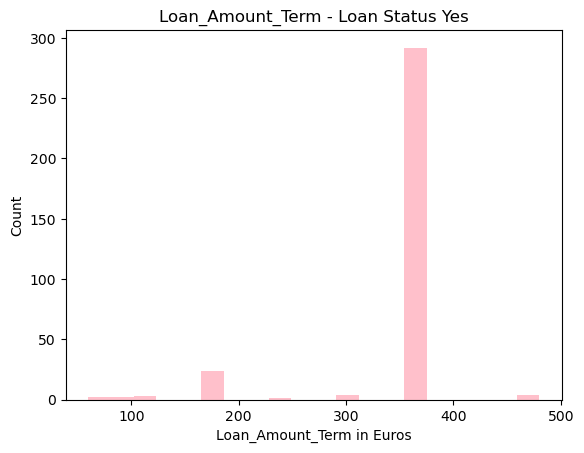

In [29]:
Status_Yes_Loan_Amount_Term = Loan_Yes["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status Yes")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

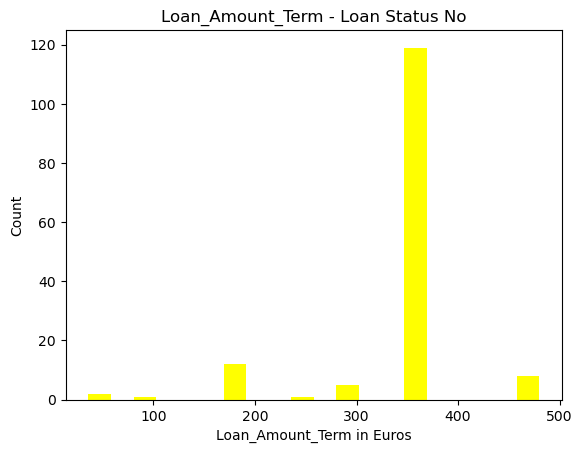

In [30]:
Status_Yes_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "yellow")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

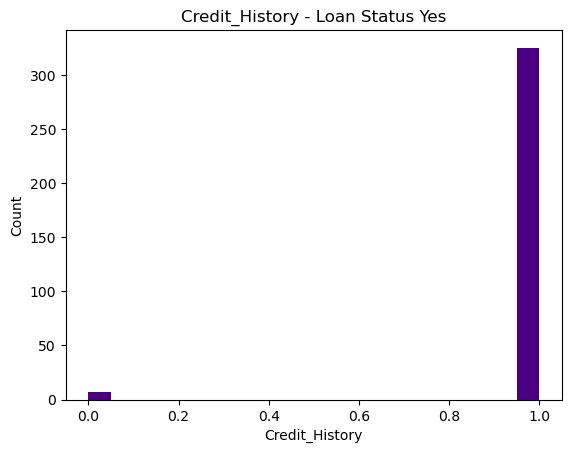

In [31]:
Status_Yes_Credit_History = Loan_Yes["Credit_History"]
  
plt.hist(Status_Yes_Credit_History, bins = 20, color = "indigo")
plt.title("Credit_History - Loan Status Yes")
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()

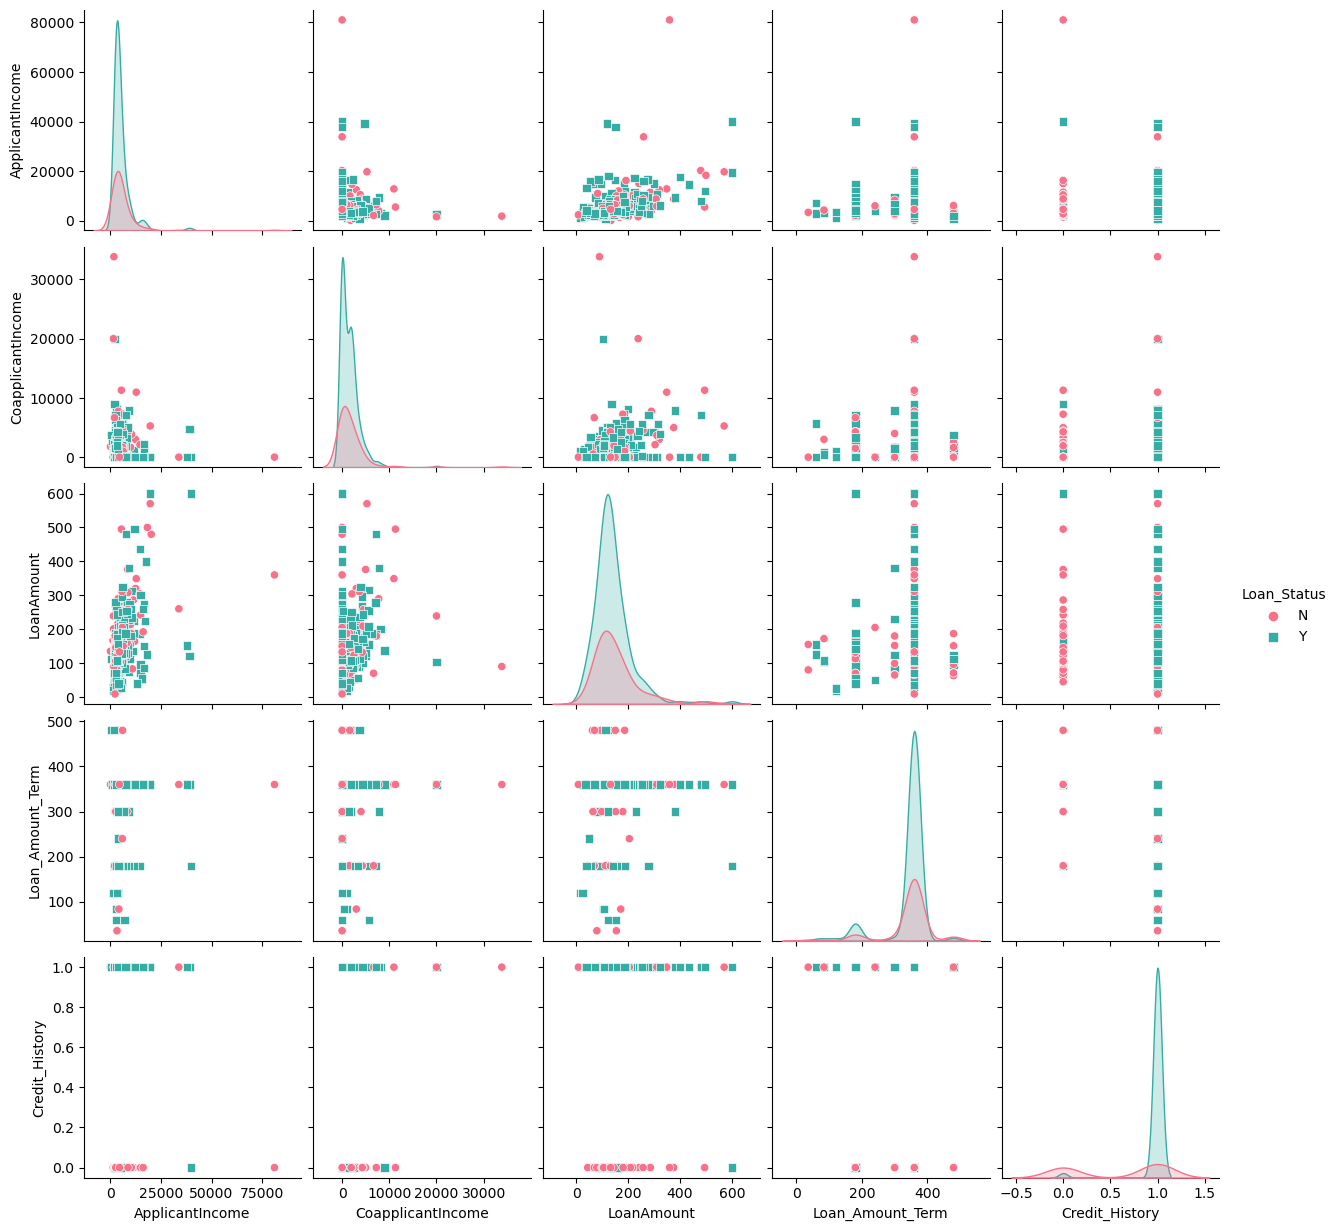

In [32]:
sns.pairplot(loan_eligibility,hue="Loan_Status", palette="husl", markers=["o", "s"])
plt.show()

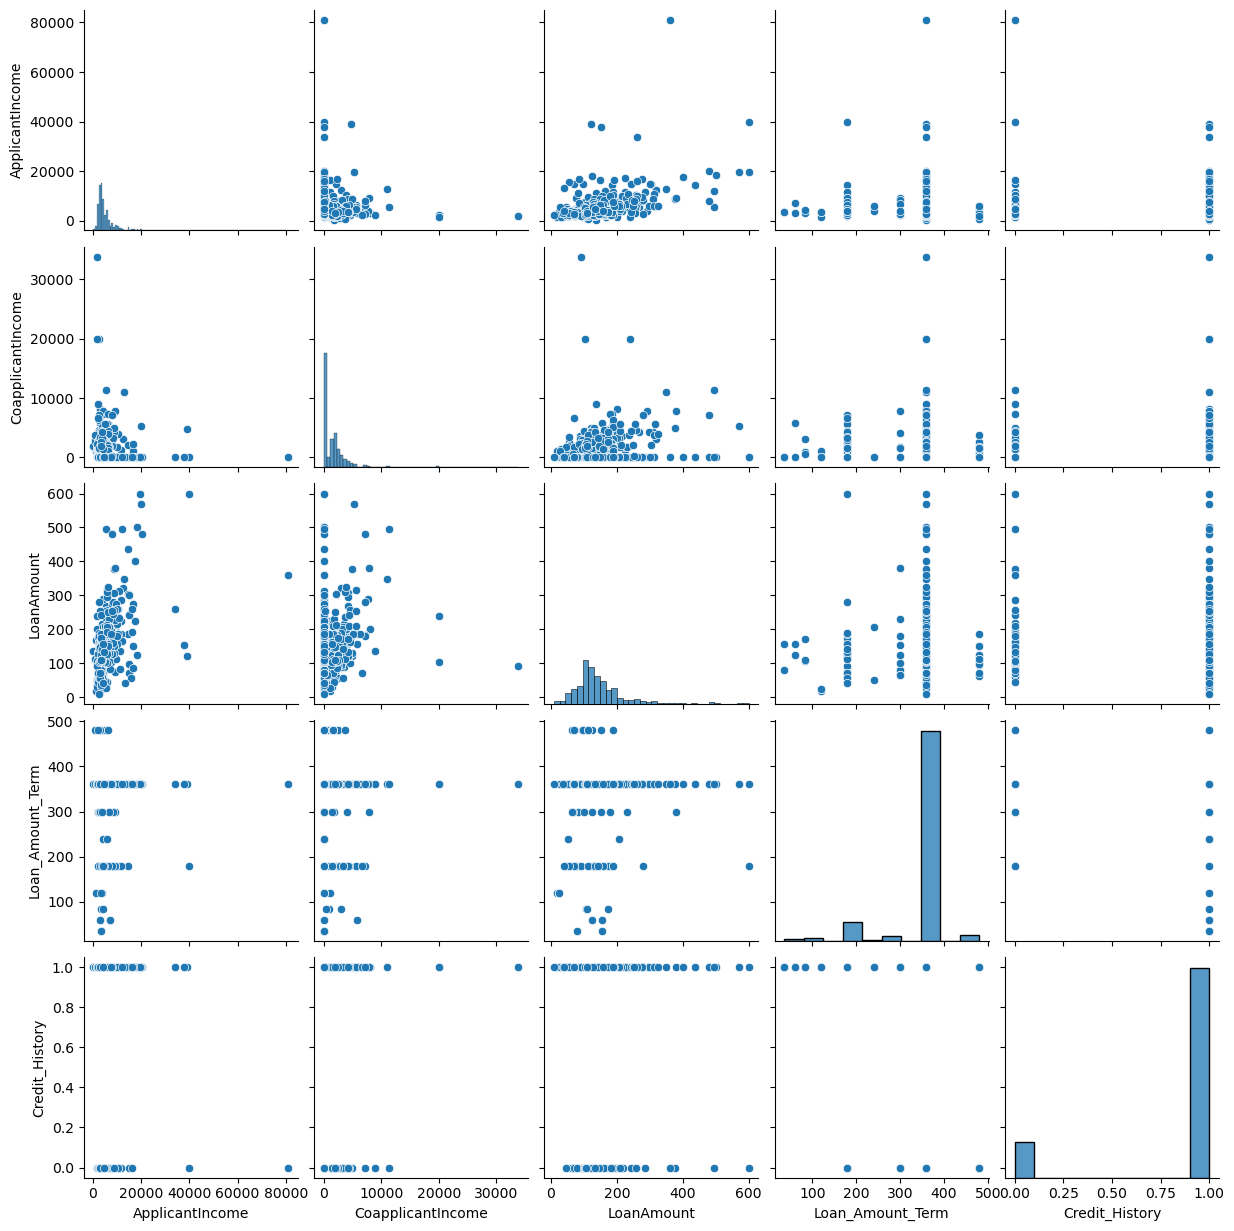

In [33]:
sns.pairplot(loan_eligibility)

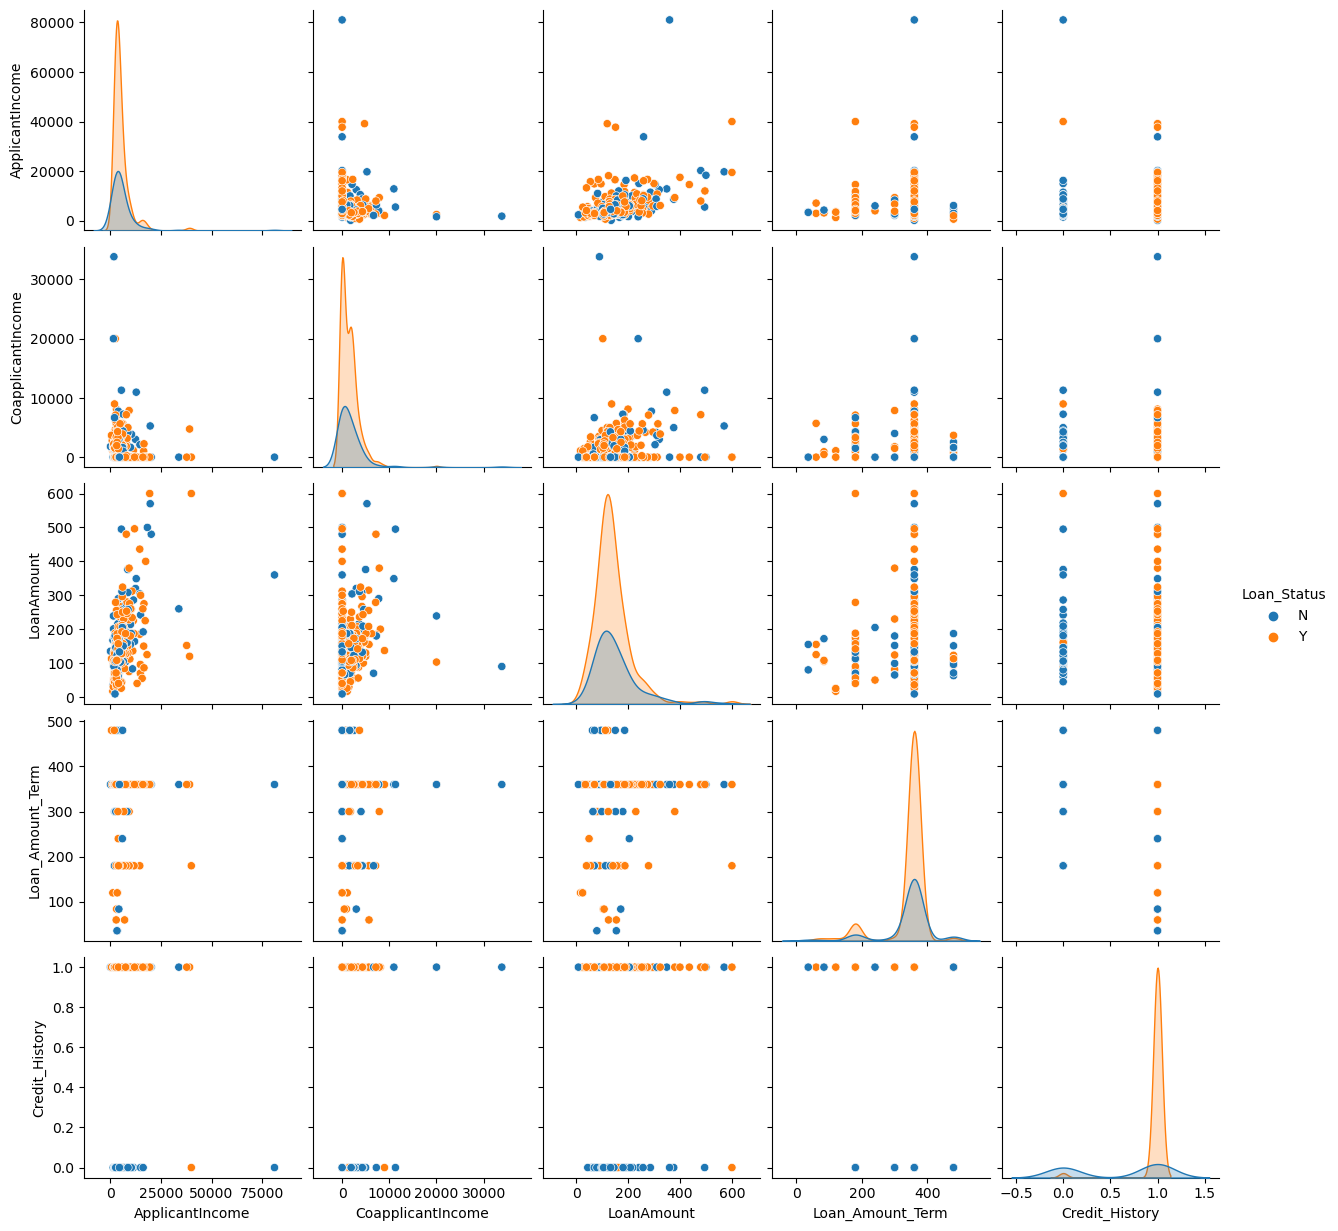

In [34]:
sns.pairplot(loan_eligibility, hue='Loan_Status')

# Correlation Coefficient

In [35]:
print(loan_eligibility.corr(method='pearson'))

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.010838       -0.056152  
CoapplicantIncome         -0.005775       -0.008692  
LoanAmount                 0.050867       -0.040773  
Loan_Amount_Term           1.000000        0.032937  
Credit_History             0.032937        1.000000  


In [36]:
print(Loan_No.corr(method='pearson'))

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.078016    0.511014   
CoapplicantIncome        -0.078016           1.000000    0.227973   
LoanAmount                0.511014           0.227973    1.000000   
Loan_Amount_Term          0.055122          -0.039227    0.076849   
Credit_History           -0.007766           0.044403    0.063723   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.055122       -0.007766  
CoapplicantIncome         -0.039227        0.044403  
LoanAmount                 0.076849        0.063723  
Loan_Amount_Term           1.000000        0.033359  
Credit_History             0.033359        1.000000  


In [37]:
#Loan Status Encoding
loan_eligibility['Loan_Status'] = loan_eligibility.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [38]:
# Gender Male = 0, Female = 1
#loan_eligibility['Loan_Status'] = loan_eligibility.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [39]:
#Gender Encoding
loan_eligibility= loan_eligibility.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
loan_eligibility =loan_eligibility.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
loan_eligibility['Dependents'] = loan_eligibility['Dependents'].replace('3+', '3')
loan_eligibility['Dependents']=pd.to_numeric(loan_eligibility['Dependents'], errors='coerce')

#Count the quantity of values on the column
loan_eligibility['Self_Employed'].value_counts()
loan_eligibility= loan_eligibility.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
loan_eligibility['Education'].value_counts()
loan_eligibility= loan_eligibility.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
loan_eligibility = loan_eligibility.drop(columns=['Loan_ID'])

#Property Area Encoding
loan_eligibility['Property_Area'].value_counts()
loan_eligibility['Property_Area'] = loan_eligibility['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})


#### Summary
* Gender - Male = 1, Female = 0
* Self Employed - Yes = 1, No = 0
* Education - Graduate = 1, Not Graduate = 0
* Property Area - Rural = 0, Urban = 1 and Semiurban = 2

In [40]:
loan_eligibility.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1


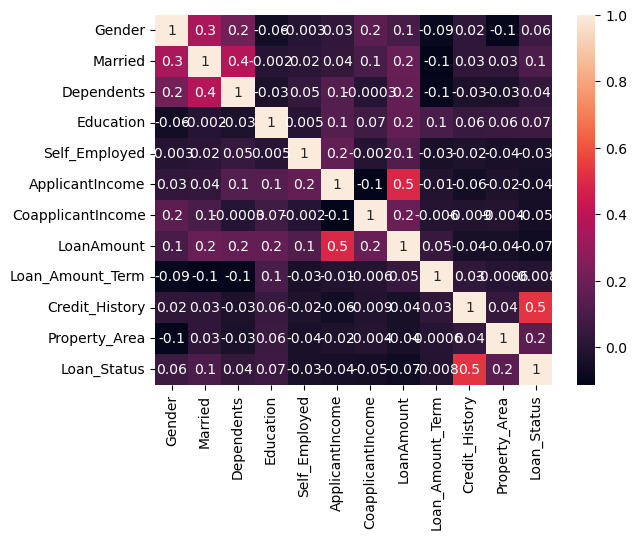

In [41]:
sns.heatmap(loan_eligibility.corr(),annot=True,fmt='.1g')
#sns.heatmap(loan_eligibility.corr(),annot=True,fmt='.5g',vmax=300)
plt.show()

#### Gender 0.06, Married 0.1, Education 0.07, Loan Amount Term .008, Credit History 0.5 and Property Area 0.2

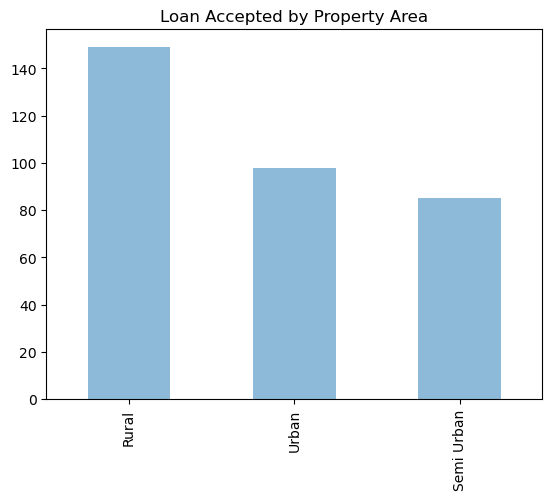

In [42]:
loan_eligibility.Property_Area[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
property=['Rural','Urban','Semi Urban']
pos = np.arange(len(property))
plt.xticks(pos, property)
plt.show()

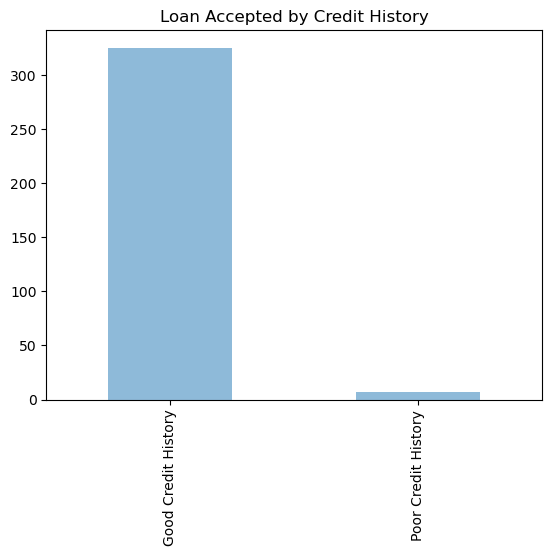

In [43]:
loan_eligibility.Credit_History[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit History')
credit=['Good Credit History','Poor Credit History']
pos = np.arange(len(credit))
plt.xticks(pos, credit)
plt.show()

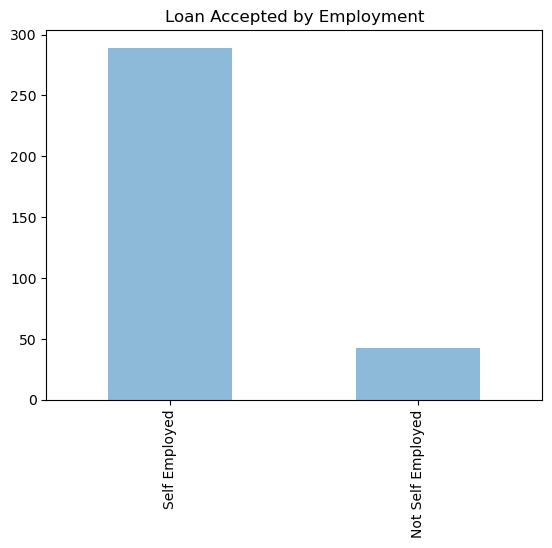

In [44]:
loan_eligibility.Self_Employed[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Employment')
employment=['Self Employed','Not Self Employed']
pos = np.arange(len(employment))
plt.xticks(pos, employment)
plt.show()

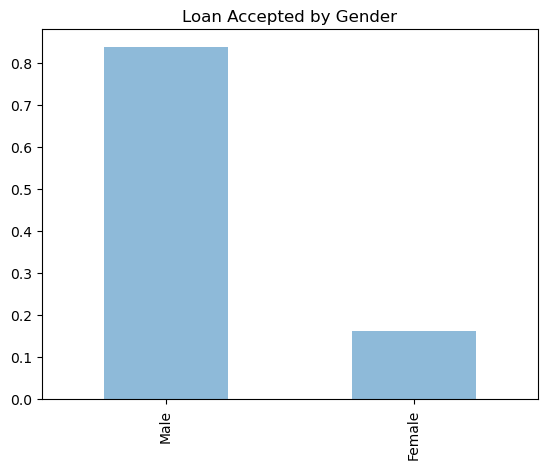

In [45]:
#loan_eligibility.Gender[loan_eligibility.Loan_Status==0].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
loan_eligibility.Gender[loan_eligibility.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Gender')
gender=['Male','Female']
pos = np.arange(len(gender))
plt.xticks(pos, gender)
plt.show()

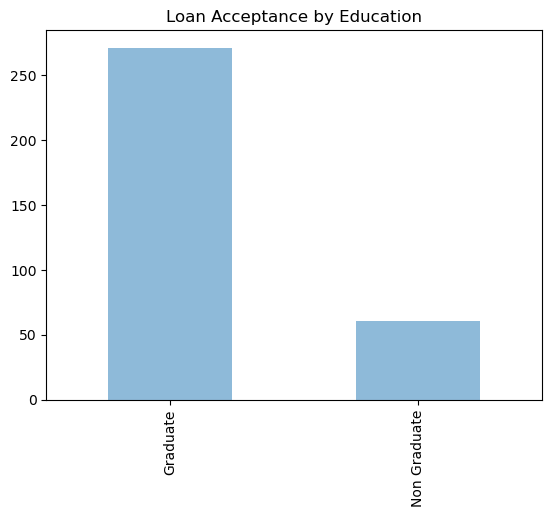

In [46]:
loan_eligibility.Education[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Acceptance by Education')
graduate=['Graduate','Non Graduate']
pos = np.arange(len(graduate))
plt.xticks(pos, graduate)
plt.show()

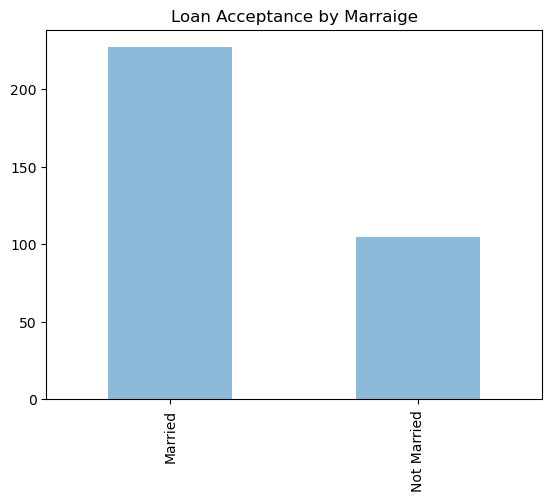

In [47]:
loan_eligibility.Married[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Acceptance by Marraige')
married=['Married','Not Married']
pos = np.arange(len(married))
plt.xticks(pos, married)
plt.show()

In [48]:
sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

278

In [49]:
sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==0]) + sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

394

In [50]:
loan_eligibility

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [51]:
loan_eligibility["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [52]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [53]:
(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

2      1
3      1
4      1
5      1
6      1
      ..
608    1
609    0
610    1
611    1
612    1
Name: Gender, Length: 332, dtype: int64

In [54]:
print(loan_eligibility.shape)
print(loan_eligibility.Gender[loan_eligibility.Loan_Status==0])

(480, 12)
1      1
7      1
9      1
13     1
17     0
      ..
585    1
589    1
591    1
596    1
613    0
Name: Gender, Length: 148, dtype: int64


In [55]:
loan_eligibility["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [56]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [57]:
loan_eligibility["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [58]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==0].value_counts())

1    84
0    64
Name: Married, dtype: int64

In [59]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==1].value_counts())

1    227
0    105
Name: Married, dtype: int64

In [60]:
a = loan_eligibility.Married[loan_eligibility.Loan_Status==0]
b = loan_eligibility.Married[loan_eligibility.Loan_Status==1]

In [61]:
print(a)

1      1
7      1
9      1
13     0
17     0
      ..
585    1
589    1
591    1
596    1
613    0
Name: Married, Length: 148, dtype: int64


In [62]:
print(b)

2      1
3      1
4      0
5      1
6      1
      ..
608    1
609    0
610    1
611    1
612    1
Name: Married, Length: 332, dtype: int64


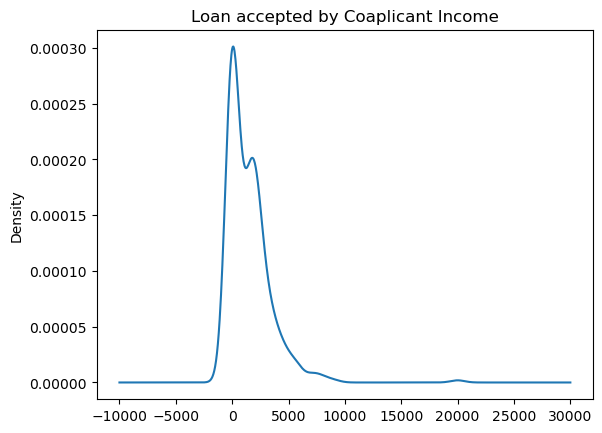

In [63]:
loan_eligibility.CoapplicantIncome[loan_eligibility.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

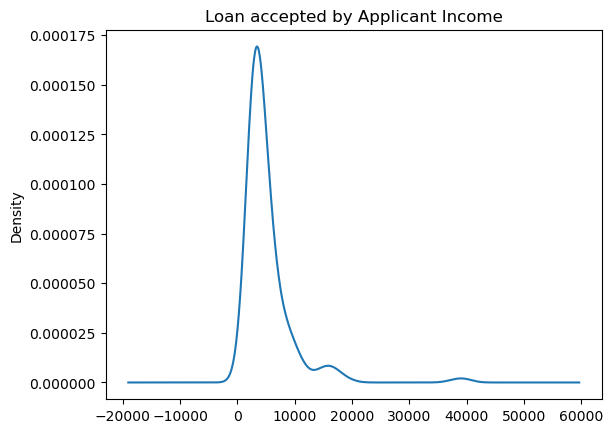

In [64]:
loan_eligibility.ApplicantIncome[loan_eligibility.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Applicant Income')
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

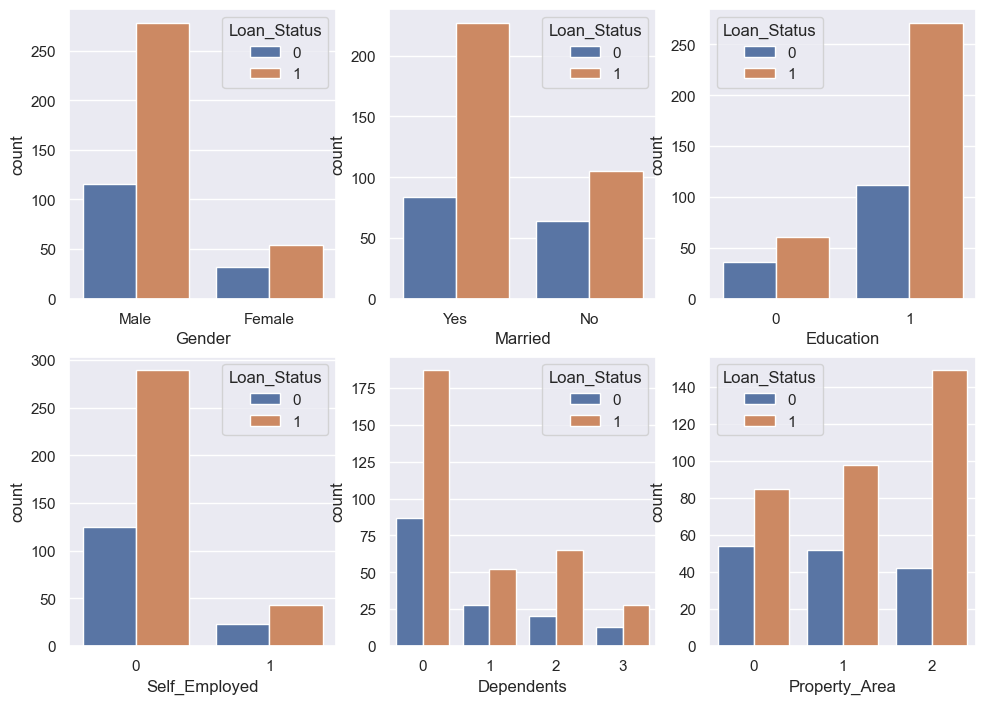

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=loan_eligibility)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=loan_eligibility)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=loan_eligibility)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=loan_eligibility)

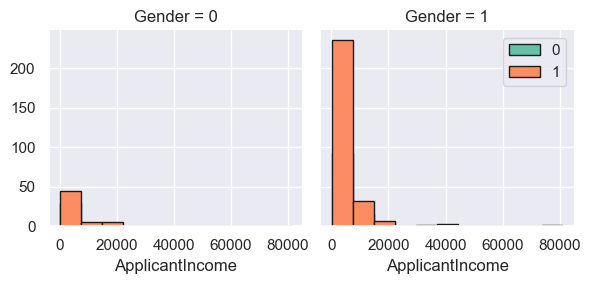

In [66]:
bins = np.linspace(loan_eligibility.ApplicantIncome.min(), loan_eligibility.ApplicantIncome.max(),12)
graph = sns.FacetGrid(loan_eligibility, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [67]:
loan_eligibility

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


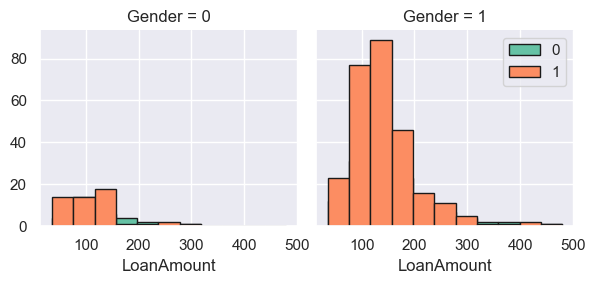

In [68]:
bins = np.linspace(loan_eligibility.Loan_Amount_Term.min(), loan_eligibility.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(loan_eligibility, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [69]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [70]:
crosstb

Loan_Status,0,1,All
Gender,,,
0,0.066667,0.112500,0.179167
1,0.241667,0.579167,0.820833
All,0.308333,0.691667,1.000000


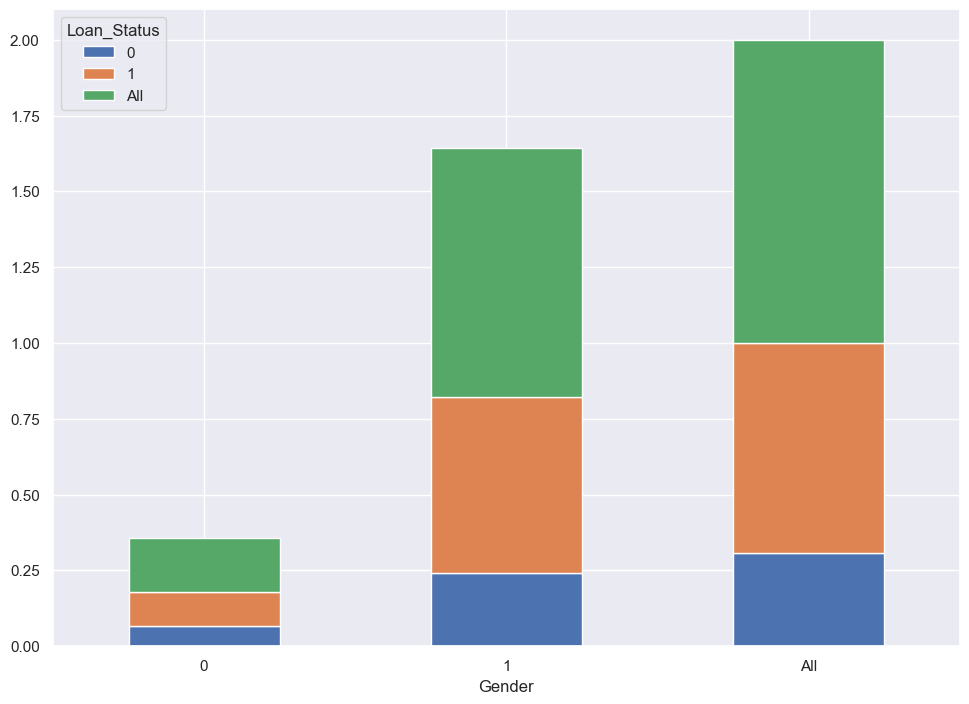

In [71]:
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [72]:
crosstb = pd.crosstab(loan_eligibility.Education, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [73]:
crosstb

Loan_Status,0,1,All
Education,,,
0,0.075000,0.127083,0.202083
1,0.233333,0.564583,0.797917
All,0.308333,0.691667,1.000000


In [74]:
crosstb = pd.crosstab(loan_eligibility.Married, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [75]:
crosstb

Loan_Status,0,1,All
Married,,,
0,0.133333,0.218750,0.352083
1,0.175000,0.472917,0.647917
All,0.308333,0.691667,1.000000


In [76]:
crosstb = pd.crosstab(loan_eligibility.Self_Employed, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [77]:
crosstb

Loan_Status,0,1,All
Self_Employed,,,
0,0.260417,0.602083,0.8625
1,0.047917,0.089583,0.1375
All,0.308333,0.691667,1.0000


In [78]:
crosstb = pd.crosstab(loan_eligibility.Property_Area, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [79]:
crosstb

Loan_Status,0,1,All
Property_Area,,,
0,0.112500,0.177083,0.289583
1,0.108333,0.204167,0.312500
2,0.087500,0.310417,0.397917
All,0.308333,0.691667,1.000000


In [80]:
crosstb = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [81]:
crosstb

Loan_Status,0,1,All
Credit_History,,,
0.0,0.131250,0.014583,0.145833
1.0,0.177083,0.677083,0.854167
All,0.308333,0.691667,1.000000


In [82]:
crosstb = pd.crosstab(loan_eligibility.Loan_Amount_Term, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [83]:
crosstb

Loan_Status,0,1,All
Loan_Amount_Term,,,
36.0,0.004167,0.000000,0.004167
60.0,0.000000,0.004167,0.004167
84.0,0.002083,0.004167,0.006250
120.0,0.000000,0.006250,0.006250
180.0,0.025000,0.050000,0.075000
240.0,0.002083,0.002083,0.004167
300.0,0.010417,0.008333,0.018750
360.0,0.247917,0.608333,0.856250
480.0,0.016667,0.008333,0.025000


In [84]:
n=3
k = random.randint(0, 1) # decide on k once
for _ in range(n):
    print(k) # pr

0
0
0


In [85]:
print(random.randint(0, 1))

0


In [86]:
simulation_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])

In [87]:
print(simulation_data)

Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [88]:
#data["Type"][i-1] == "Fire":
#        Type_new[i]="Orange"
#        random.randint(0, 1)

In [89]:
for x in range(10):
    print(x)
    x = x + 1
print(simulation_data)

0
1
2
3
4
5
6
7
8
9
Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [90]:
#for x in range(10):
    #print(random.randint(0, 1))
#    simulation_data["Loan_Status"][x] == "apple"
#    x = x + 1
#print(simulation_data)

In [124]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [125]:
crosstb

Loan_Status,0,1,All
Gender,,,
0,0.066667,0.112500,0.179167
1,0.241667,0.579167,0.820833
All,0.308333,0.691667,1.000000


In [231]:
#bank = pd.DataFrame(columns=['Gender','Married','Self_Employed','Property_Area','Credit_History', 'Loan_Status'])
#for x in range(25):
#    new_row = {'Gender':random.randint(0, 1), 'Married':random.randint(0, 1),'Self_Employed':random.randint(0, 1), 'Property_Area':random.randint(0, 1),'Credit_History':random.randint(0, 1), 'Loan_Status':random.randint(0, 1)}
#    bank = bank.append(new_row, ignore_index=True)
#    x = x + 1

#new_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])
#new_row = {'Credit_History':1.0, 'Loan_Status':1}
#append row to the dataframe
#new_data = new_data.append(new_row, ignore_index=True)
#choices = [2, 4] 
#weights = [0.75, 0.25] 
#rnd = np.random.choice(choices, p=weights) 
gender = "NY"

bank = pd.DataFrame(columns=['Gender','Married','Self_Employed','Property_Area','Credit_History', 'Loan_Status'])
for x in range(100):
    #new_row = {'Gender':random.randint(0, 1), 'Married':random.randint(0, 1),'Self_Employed':random.randint(0, 1), 'Property_Area':random.randint(0, 1),'Credit_History':random.randint(0, 1), 'Loan_Status':random.randint(0, 1)}
    a = random.choices("MF", cum_weights=(0.82,1.00), k=1)
    b = random.choices("YN", cum_weights=(0.69,1.00), k=1)
    c = random.choices("YN", cum_weights=(0.9,1.00), k=1)
    d = random.choices("10", cum_weights=(0.9,1.00), k=1)
    e = random.choices("012", cum_weights=(0.9,0.3,1.00), k=1)
    new_row = {'Gender':a[0],'Married':random.randint(0, 1),'Self_Employed':c[0], 'Property_Area':d[0],'Credit_History':d[0], 'Loan_Status':b[0]}
    #random.choices(["white", "green", "red"], [12, 12, 4], k=10)
    bank = bank.append(new_row, ignore_index=True)
    
    x = x + 1


C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)


C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\169576950.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)


In [232]:
print(bank)

   Gender Married Self_Employed Property_Area Credit_History Loan_Status
0       M       1             Y             1              1           Y
1       M       0             Y             1              1           N
2       F       0             Y             1              1           N
3       M       0             Y             1              1           N
4       M       1             Y             1              1           Y
..    ...     ...           ...           ...            ...         ...
95      M       1             Y             1              1           N
96      F       1             Y             1              1           N
97      M       0             N             1              1           N
98      M       1             Y             1              1           N
99      F       1             Y             0              0           N

[100 rows x 6 columns]


In [233]:
crosstb = pd.crosstab(bank.Gender, bank.Loan_Status, normalize=True, margins=True)

In [234]:
crosstb

Loan_Status,N,Y,All
Gender,,,
F,0.09,0.13,0.22
M,0.38,0.40,0.78
All,0.47,0.53,1.00


In [235]:
crosstb = pd.crosstab(loan_eligibility.Loan_Status, loan_eligibility.Gender, normalize=False, margins=True)

In [236]:
crosstb

Gender,0,1,All
Loan_Status,,,
0,32,116,148
1,54,278,332
All,86,394,480


In [237]:
crosstb = pd.crosstab(bank.Self_Employed, bank.Loan_Status, normalize=True, margins=True)

In [238]:
crosstab

Loan_Status,N,Y,All
Credit_History,,,
0,0.00,0.07,0.07
1,0.24,0.69,0.93
All,0.24,0.76,1.00


In [239]:
print(bank["Gender"].value_counts())

M    78
F    22
Name: Gender, dtype: int64


In [240]:
crosstab = pd.crosstab(bank.Married, bank.Loan_Status, normalize=True, margins=True)

In [241]:
crosstab

Loan_Status,N,Y,All
Married,,,
0,0.17,0.29,0.46
1,0.30,0.24,0.54
All,0.47,0.53,1.00


In [242]:
crosstab = pd.crosstab(bank.Credit_History, bank.Loan_Status, normalize=True, margins=True)

In [243]:
crosstab

Loan_Status,N,Y,All
Credit_History,,,
0,0.04,0.04,0.08
1,0.43,0.49,0.92
All,0.47,0.53,1.00


In [245]:
crosstab = pd.crosstab(bank.Property_Area, bank.Loan_Status, normalize=True, margins=True)

In [246]:
crosstab

Loan_Status,N,Y,All
Property_Area,,,
0,0.04,0.04,0.08
1,0.43,0.49,0.92
All,0.47,0.53,1.00


In [244]:
new_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])
new_row = {'Credit_History':1.0, 'Loan_Status':1}
#append row to the dataframe
new_data = new_data.append(new_row, ignore_index=True)

C:\Users\Teacher\AppData\Local\Temp\ipykernel_9816\1672992680.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)


In [89]:
data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])

In [90]:
print(data)

Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [91]:
#data = pd.DataFrame()

In [92]:
print(data)

Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [93]:
data['Loan_Status']

Series([], Name: Loan_Status, dtype: object)

In [94]:
letters = ["N", "Y"]
for i in range(10):
    i = i + 1
    data.append({'Loan_Status' : 'random.choice(letters)})
    

SyntaxError: EOL while scanning string literal (1394269471.py, line 4)

In [95]:
letters = ["N", "Y"]
for i in range(10):
    i = i + 1
    print(random.choice(letters))
    data.append()

Y


TypeError: append() missing 1 required positional argument: 'other'